In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from skimage import io
import TOF_routines
from TOF_routines import l2tof, tof2l
from TOF_routines import find_nearest
from astropy.io import fits
from matplotlib_scalebar.scalebar import ScaleBar

In [2]:
# This are the images without BB correction
nBins=165 
spectrum_img=np.zeros((476,476,nBins))
print(np.shape(spectrum_img))
for i in range (0, nBins):
    filename = 'D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249\\bin'+str(i).zfill(4)+'\slice_0310.tif'
    spectrum_img[:,:,i]=io.imread(filename)
#     print(filename)

(476, 476, 165)


In [3]:
# I now load the images with BB correction
nBins=165 
spectrum_img_BB=np.zeros((476,476,nBins))
print(np.shape(spectrum_img_BB))
for i in range (0, nBins):
    filename = 'D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected_const_dose\\bin'+str(i).zfill(4)+'\slice_0310.tif'
    spectrum_img_BB[:,:,i]=io.imread(filename)
#     print(filename)

(476, 476, 165)


In [4]:
nBins=165 
spectrum_IMAT=np.zeros((512,512,nBins))
print(np.shape(spectrum_IMAT))
for i in range (0, nBins):
#     filename = 'D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected_const\\bin'+str(i).zfill(4)+'\slice_0405.tif'
    filename = 'D:/Kaestner/ISIS_IAEAData/RB1730015/Tomo_test_RB1730044/OpenBeam_aft3_Corrected_Binned/IMAT_tomo_binned_'+str(i).zfill(5)+'.fits'
    with fits.open(filename) as f:
        spectrum_IMAT[:,:,i]=f[0].data

(512, 512, 165)


In [5]:
Ti = np.zeros(nBins)
Fe = np.zeros(nBins)
Pb = np.zeros(nBins)
Ni = np.zeros(nBins)
Cu = np.zeros(nBins)
Al = np.zeros(nBins)
Ti_BB = np.zeros(nBins)
Fe_BB = np.zeros(nBins)
Pb_BB = np.zeros(nBins)
Ni_BB = np.zeros(nBins)
Cu_BB = np.zeros(nBins)
Al_BB = np.zeros(nBins)

for i in range(0,nBins):
    Ti[i] = np.median(spectrum_img[150:200,80:130,i])
    Pb[i] = np.median(spectrum_img[50:100,200:250,i])
    Fe[i] = np.median(spectrum_img[300:350, 80:130,i])
    Cu[i] = np.median(spectrum_img[130:180,350:400,i])
    Ni[i] = np.median(spectrum_img[380:430,230:280,i])
    Al[i] = np.median(spectrum_img[280:330,330:380,i])
    Ti_BB[i] = np.median(spectrum_img_BB[150:200,80:130,i])
    Pb_BB[i] = np.median(spectrum_img_BB[50:100,200:250,i])
    Fe_BB[i] = np.median(spectrum_img_BB[300:350, 80:130,i])
    Cu_BB[i] = np.median(spectrum_img_BB[130:180,350:400,i])
    Ni_BB[i] = np.median(spectrum_img_BB[380:430,230:280,i])
    Al_BB[i] = np.median(spectrum_img_BB[280:330,330:380,i])
    
    

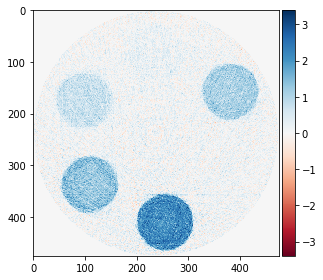

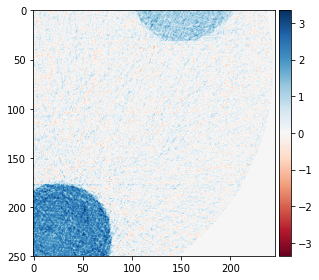

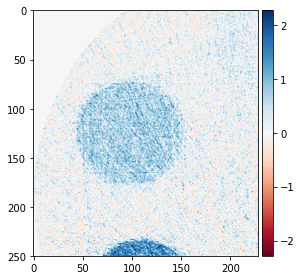

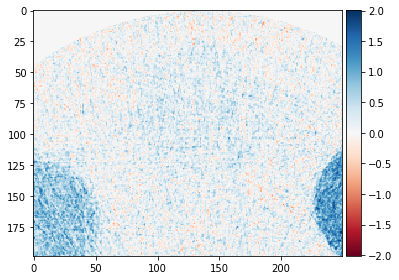

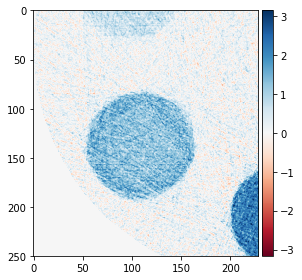

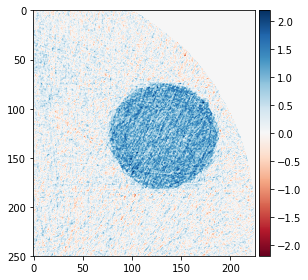

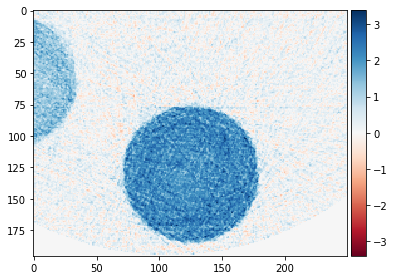

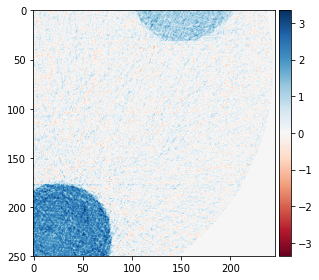

In [6]:
plt.figure()
io.imshow(spectrum_img[:,:,100])

plt.figure()
io.imshow(spectrum_img[280-100:330+100,330-100:380+100,100])

plt.figure()
io.imshow(spectrum_img[150-100:200+100,80-79:130+100,100])

plt.figure()
io.imshow(spectrum_img[50-49:100+100,200-100:250+100,100])

plt.figure()
io.imshow(spectrum_img[300-100:350+100, 80-79:130+100,100])

plt.figure()
io.imshow(spectrum_img[130-100:180+100,350-100:400+100,100])

plt.figure()
io.imshow(spectrum_img[380-100:430+100,230-100:280+100,100])

plt.figure()
io.imshow(spectrum_img[280-100:330+100,330-100:380+100,100])

In [7]:
myTOF = np.genfromtxt('D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\Sample\\angle0\IMAT00004675_Tomo_test_000_Spectra.txt', usecols=0)
t0 =  0.0
L = 56
h=6.62607004e-34 #Planck constant [m^2 kg / s]
m=1.674927471e-27 #Neutron mass [kg]
lambda0=0
myLambda =tof2l(myTOF, lambda0,t0,L)
lambda_bin = myLambda[1::18]

In [8]:
filename ="Cu.txt"
data_Cu = np.genfromtxt(filename)
print(np.shape(data_Cu))

data_Fe = np.genfromtxt('Fe.txt')
data_Pb=np.genfromtxt('Pb.txt')
data_Ti=np.genfromtxt('Ti.txt')
data_Ni=np.genfromtxt('Ni.txt')
data_Al = np.genfromtxt('Al.txt')

(300, 2)


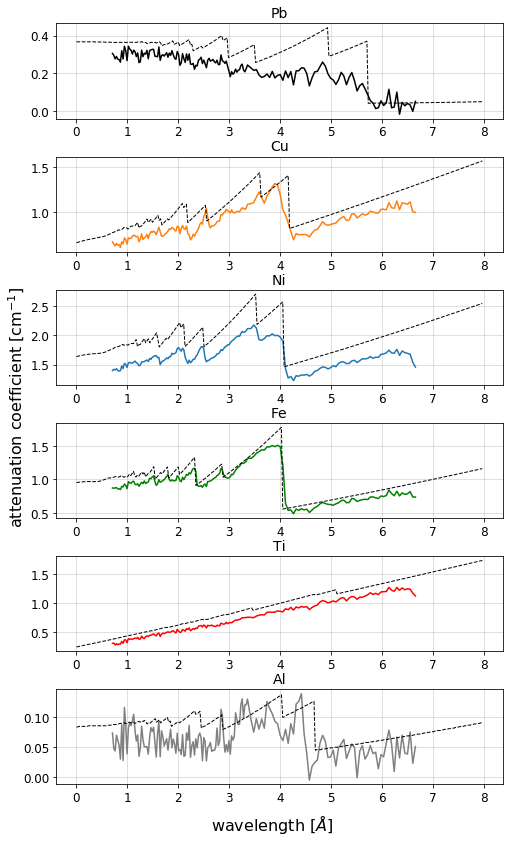

In [9]:
fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(8, 14))

plt.subplot(611)
plt.plot(lambda_bin, Pb, 'k')
plt.plot(data_Pb[:,0],data_Pb[:,1],'--k',linewidth=1)
plt.title('Pb', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(612)
plt.plot(lambda_bin, Cu, 'C1')
plt.plot(data_Cu[:,0],data_Cu[:,1],'--k',linewidth=1)
plt.title('Cu', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(613)
plt.plot(lambda_bin, Ni)
plt.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1)
plt.title('Ni', fontsize=14) 
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.subplot(614)
plt.plot(lambda_bin, Fe,'g')
plt.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1)
plt.title('Fe', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(615)
plt.plot(lambda_bin, Ti,'r')
plt.plot(data_Ti[:,0],data_Ti[:,1],'--k',linewidth=1)
plt.title('Ti', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(616)
plt.plot(lambda_bin, Al, 'gray')
plt.plot(data_Al[:,0],data_Al[:,1],'--k',linewidth=1)
plt.title('Al', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplots_adjust(hspace=0.4)
fig.text(0.5, 0.08, 'wavelength [$\AA$]', ha='center',fontsize=16)
fig.text(0.04, 0.5, 'attenuation coefficient [cm$^{-1}$]', va='center', rotation='vertical', fontsize=16)

# plt.savefig('spectra_plots.tiff')
plt.savefig('spectra_plots_NOBB_dose.png', dpi=500)
# plt.savefig('spectra_plots.pdf')

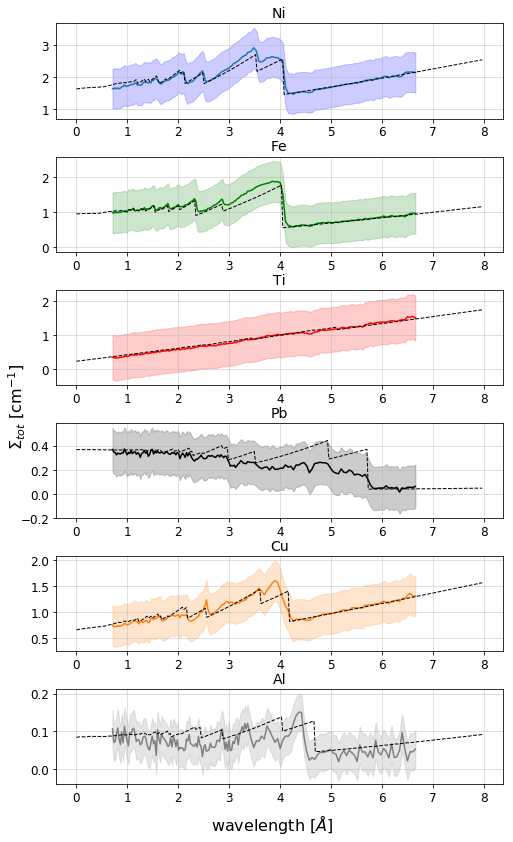

In [24]:
fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(8, 14))

plt.subplot(611)
plt.plot(lambda_bin, Ni_BB)
plt.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1)
plt.fill_between(lambda_bin, Ni_BB-1.96*np.std(Ni_BB), Ni_BB+1.96*np.std(Ni_BB), color='b', alpha=0.2)
plt.title('Ni', fontsize=14) 
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(612)
plt.plot(lambda_bin, Fe_BB,'g')
plt.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1)
plt.fill_between(lambda_bin, Fe_BB-1.96*np.std(Fe_BB), Fe_BB+1.96*np.std(Fe_BB), color='g', alpha=0.2)
plt.title('Fe', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(613)
plt.plot(lambda_bin, Ti_BB,'r')
plt.plot(data_Ti[:,0],data_Ti[:,1],'--k',linewidth=1)
plt.fill_between(lambda_bin, Ti_BB-1.96*np.std(Ti_BB), Ti_BB+1.96*np.std(Ti_BB), color='r', alpha=0.2)
plt.title('Ti', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(614)
plt.plot(lambda_bin, Pb_BB, 'k')
plt.plot(data_Pb[:,0],data_Pb[:,1],'--k',linewidth=1)
plt.fill_between(lambda_bin, Pb_BB-1.96*np.std(Pb_BB), Pb_BB+1.96*np.std(Pb_BB), color='k', alpha=0.2)
plt.title('Pb', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(615)
plt.plot(lambda_bin, Cu_BB, 'C1')
plt.plot(data_Cu[:,0],data_Cu[:,1],'--k',linewidth=1)
plt.fill_between(lambda_bin, Cu_BB-1.96*np.std(Cu_BB), Cu_BB+1.96*np.std(Cu_BB), color='C1', alpha=0.2)
plt.title('Cu', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(616)
plt.plot(lambda_bin, Al_BB, 'gray')
plt.plot(data_Al[:,0],data_Al[:,1],'--k',linewidth=1)
plt.fill_between(lambda_bin, Al_BB-1.96*np.std(Al_BB), Al_BB+1.96*np.std(Al_BB), color='gray', alpha=0.2)
plt.title('Al', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplots_adjust(hspace=0.4)
fig.text(0.5, 0.08, 'wavelength [$\AA$]', ha='center',fontsize=16)
fig.text(0.04, 0.5, '$\Sigma_{tot}$ [cm$^{-1}$]', va='center', rotation='vertical', fontsize=16)
plt.savefig('spectra_plots_BB_dose_50x50.png', dpi=500)
plt.savefig('spectra_plots_BB_dose_50x50.pdf')

In [11]:
spectrum = np.zeros(nBins)
for i in range(0,nBins):
    spectrum[i] = np.median(spectrum_IMAT[:,:,i])

(165,)


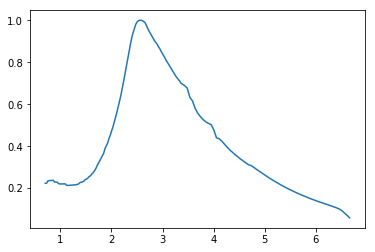

In [12]:
# Here I compensate for the different 

# plt.figure()
# plt.plot(lambda_bin,'.')
# plt.figure()
# plt.plot(lambda_bin, spectrum)

spectrum_proc = np.zeros(nBins)

for i in range(0,nBins):
    
    if i<101:
        spectrum_proc[i] = spectrum[i]
    else:
        spectrum_proc[i] = spectrum[i]/2.0


print(np.shape(spectrum_proc))

spectrum_proc[101] = (spectrum_proc[100]+spectrum_proc[102])/2

plt.figure()
plt.plot(lambda_bin, spectrum_proc/np.max(spectrum_proc))

In [13]:
# Expected Attenuation coefficients for the white beam tomo
spectrum_norm = spectrum_proc/np.max(spectrum_proc)
data_Ti[:,1]
pos1 = find_nearest(data_Ti[:,0], 0.7)
pos2 = find_nearest(data_Ti[:,0], 6.7)
print(pos1,pos2)

att_Ti = 0
att_Ni = 0
att_Fe = 0
att_Pb = 0
att_Cu = 0
att_Al = 0

for i in range(0, nBins):
    pos = find_nearest(data_Ti[:,0], lambda_bin[i])
    att_Ti += data_Ti[pos,1]*spectrum_norm[i]
    att_Ni += data_Ni[pos,1]*spectrum_norm[i]
    att_Fe += data_Fe[pos,1]*spectrum_norm[i]
    att_Pb += data_Pb[pos,1]*spectrum_norm[i]
    att_Cu += data_Cu[pos,1]*spectrum_norm[i]
    att_Al += data_Al[pos,1]*spectrum_norm[i]

print(att_Ti)
print('Ti: ', att_Ti/np.sum(spectrum_norm))
print('Ni: ', att_Ni/np.sum(spectrum_norm))
print('Fe: ', att_Fe/np.sum(spectrum_norm))
print('Cu: ', att_Cu/np.sum(spectrum_norm))
print('Pb: ', att_Pb/np.sum(spectrum_norm))
print('Al: ', att_Al/np.sum(spectrum_norm))
# print(np.sum(data_Ti[pos1:pos2,1])/(pos2-pos1))
# print(np.sum(Ti)/len(Ti))
# print(np.sum(Ti_BB)/len(Ti_BB))

# print(np.sum(data_Ti[pos1:pos2,1]*spectrum_norm)/(pos2-pos1))



26 251
59.195116405288694
Ti:  0.7949814877299375
Ni:  2.0409283754694316
Fe:  1.0913524126970093
Cu:  1.0438253813650962
Pb:  0.33589624663664336
Al:  0.09362607613759212


In [14]:
print(np.sum(Ti_BB)/len(Ti_BB))
print(np.sum(Ti)/len(Ti))
print(np.sum(data_Ti[pos1:pos2,1])/(pos2-pos1))

0.8173613744251655
0.7114324840632352
0.9295688888888889


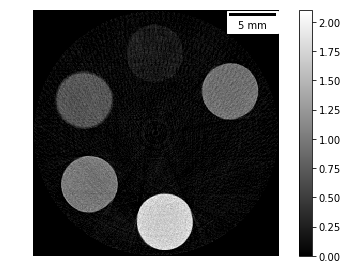

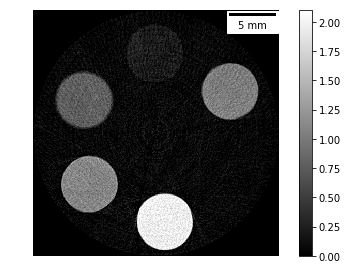

In [15]:
img_WB=io.imread('D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_WhiteBeam\slice_0405.tif')
img_WB_BB=io.imread('D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_WhiteBeam_BBcorrected\slice_0405.tif')

plt.figure()
cs=plt.imshow(img_WB, cmap='gray',vmin=0.0, vmax=2.1)
plt.axis('off')
plt.colorbar(cs)


scalebar = ScaleBar(0.000055) # 1 pixel = 0.2 meter
plt.gca().add_artist(scalebar)
plt.tight_layout()
plt.savefig('WhiteBeam.png', dpi=600) # This is also to be updated as i
# scalebar = AnchoredSizeBar(plt.get_axis, 0.055,'mm','upper right')

# plt.add_artist(scalebar)

plt.figure()
cs=plt.imshow(img_WB_BB, cmap='gray',vmin=0.0, vmax=2.1)
plt.axis('off')
plt.colorbar(cs)
scalebar2 = ScaleBar(0.000055) 
plt.gca().add_artist(scalebar2)
plt.tight_layout()
plt.savefig('WhiteBeam_BB.png', dpi=600) # This is also to be updated as i
plt.savefig('WhiteBeam_BB.pdf')

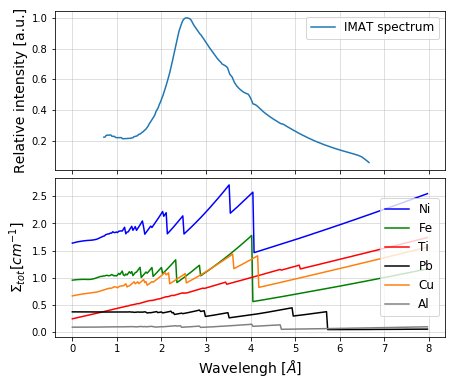

In [19]:
plt.subplots(figsize=(7,6))
ax1 = plt.subplot(211)
plt.plot(lambda_bin, spectrum_proc/np.max(spectrum_proc), label='IMAT spectrum')
plt.setp(ax1.get_xticklabels(), visible=False)
plt.ylabel('Relative intensity [a.u.]', fontsize=14)
plt.grid(alpha=0.5)
plt.legend(fontsize=12)

ax2 = plt.subplot(212, sharex=ax1)
plt.plot(data_Ni[:,0], data_Ni[:,1], c='b', label='Ni')
plt.plot(data_Fe[:,0], data_Fe[:,1], c='g', label='Fe')
plt.plot(data_Ti[:,0], data_Ti[:,1], c='r', label='Ti')
plt.plot(data_Pb[:,0], data_Pb[:,1], c='k', label='Pb')
plt.plot(data_Cu[:,0], data_Cu[:,1], c='C1',label='Cu')
plt.plot(data_Al[:,0], data_Al[:,1], c='gray', label='Al')
plt.grid(alpha=0.5)
plt.legend(loc='right', fontsize=12)

plt.xlabel('Wavelengh [$\AA$]', fontsize=14)
plt.ylabel('$\Sigma_{tot}$[$cm^{-1}$]', fontsize=14)
plt.subplots_adjust(hspace=0.05)

plt.savefig('IMAT_spectrum_And_Thoretical.png', dpi=600)

### Analysis voxel-based for the paper 

In [26]:
Ti_BB_image = spectrum_img_BB[150:200,80:130,:]
Pb_BB_image = spectrum_img_BB[50:100,200:250,:]
Fe_BB_image = spectrum_img_BB[300:350, 80:130,:]
Cu_BB_image = spectrum_img_BB[130:180,350:400,:]
Ni_BB_image = spectrum_img_BB[380:430,230:280,:]
Al_BB_image = spectrum_img_BB[280:330,330:380,:]

(50, 50, 165)
[0.71 1.23 1.77 2.29 2.81 3.33 4.37 5.41 6.45]


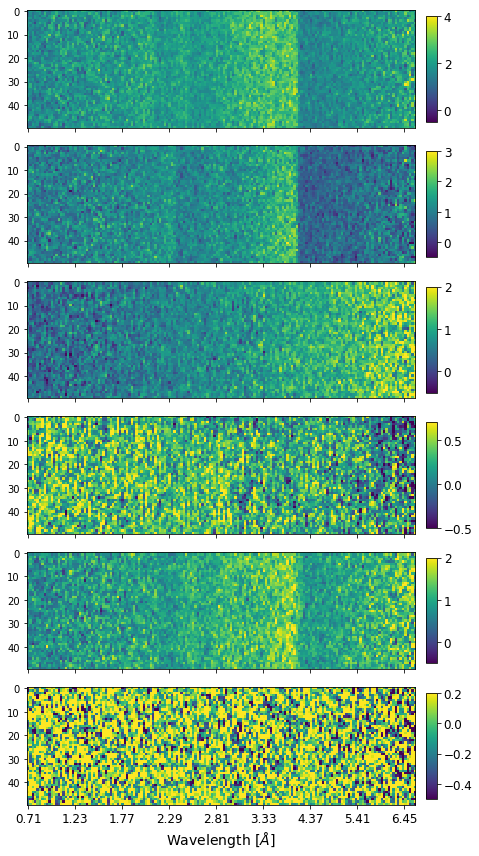

In [182]:
print(np.shape(Ti_BB_image))

fig, axes = plt.subplots(6,figsize=(8,12),sharex=True, sharey=True)

c1 = axes[0].imshow(Ni_BB_image[:,25,:], cmap='viridis', vmin=-0.5, vmax=4.0)
cb = fig.colorbar(c1, ax=axes[0], shrink=0.9, pad=0.02, aspect=10)
cb.ax.tick_params(labelsize=12)

c2 = axes[1].imshow(Fe_BB_image[:,25,:], cmap='viridis', vmin=-0.5, vmax=3.0)
cb=fig.colorbar(c2, ax=axes[1], shrink=0.9, pad=0.02, aspect=10)
cb.ax.tick_params(labelsize=12)

c3=axes[2].imshow(Ti_BB_image[:,25,:], cmap='viridis', vmin=-0.5, vmax=2.0)
cb=fig.colorbar(c3, ax=axes[2], shrink=0.9, pad=0.02, aspect=10)
cb.ax.tick_params(labelsize=12)

c4=axes[3].imshow(Pb_BB_image[:,25,:], cmap='viridis', vmin=-0.5, vmax=0.7)
cb=fig.colorbar(c4, ax=axes[3], shrink=0.9, pad=0.02, aspect=10)
cb.ax.tick_params(labelsize=12)

c5=axes[4].imshow(Cu_BB_image[:,25,:], cmap='viridis', vmin=-0.5, vmax=2.0)
cb=fig.colorbar(c5, ax=axes[4], shrink=0.9, pad=0.02, aspect=10)
cb.ax.tick_params(labelsize=12)

c6=axes[5].imshow(Al_BB_image[:,25,:], cmap='viridis', vmin=-0.5, vmax=0.2)
cb=fig.colorbar(c6, ax=axes[5], shrink=0.9, pad=0.02, aspect=10)
cb.ax.tick_params(labelsize=12)

mylabels=np.round(lambda_bin[0::20],2)
axes[5].set_xticklabels([0.71, 0.71, 1.23, 1.77, 2.29, 2.81, 3.33, 4.37, 5.41, 6.45], fontsize=12)
# plt.subplots_adjust(wspace=0.005) # non cambia un cazzo
axes[5].set_xlabel('Wavelength [$\AA$]', fontsize=14)
# fig.text(0.04, 0.5, 'Pixel position', va='center', rotation='vertical', fontsize=14)

fig.tight_layout()
print(np.round(lambda_bin[0::20],2))
plt.savefig('energy_slice_viridis.pdf')


In [178]:
Ni5x5 = np.zeros(nBins)
Fe5x5 = np.zeros(nBins)
Ti5x5 = np.zeros(nBins)
Pb5x5 = np.zeros(nBins)
Cu5x5 = np.zeros(nBins)
Al5x5 = np.zeros(nBins)

for i in range(0, nBins):

    Ni5x5[i] = np.median(Ni_BB_image[23:28,23:28,i])
    Fe5x5[i] = np.median(Fe_BB_image[23:28,23:28,i])
    Ti5x5[i] = np.median(Ti_BB_image[23:28,23:28,i])
    Pb5x5[i] = np.median(Pb_BB_image[23:28,23:28,i])
    Cu5x5[i] = np.median(Cu_BB_image[23:28,23:28,i])
    Al5x5[i] = np.median(Al_BB_image[23:28,23:28,i])

print(np.shape(Ni_BB_image[20:30,20:30,i]))


(10, 10)


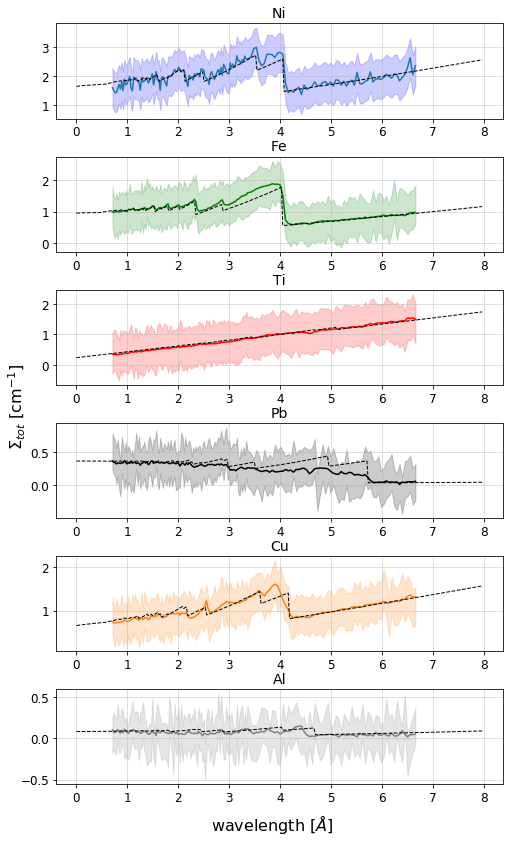

In [179]:
fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(8, 14))

plt.subplot(611)
plt.plot(lambda_bin, Ni5x5)
plt.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1)
plt.fill_between(lambda_bin, Ni5x5-1.96*np.std(Ni5x5), Ni5x5+1.96*np.std(Ni5x5), color='b', alpha=0.2)
plt.title('Ni', fontsize=14) 
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(612)
plt.plot(lambda_bin, Fe_BB,'g')
plt.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1)
plt.fill_between(lambda_bin, Fe5x5-1.96*np.std(Fe5x5), Fe5x5+1.96*np.std(Fe5x5), color='g', alpha=0.2)
plt.title('Fe', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(613)
plt.plot(lambda_bin, Ti_BB,'r')
plt.plot(data_Ti[:,0],data_Ti[:,1],'--k',linewidth=1)
plt.fill_between(lambda_bin, Ti5x5-1.96*np.std(Ti5x5), Ti5x5+1.96*np.std(Ti5x5), color='r', alpha=0.2)
plt.title('Ti', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(614)
plt.plot(lambda_bin, Pb_BB, 'k')
plt.plot(data_Pb[:,0],data_Pb[:,1],'--k',linewidth=1)
plt.fill_between(lambda_bin, Pb5x5-1.96*np.std(Pb5x5), Pb5x5+1.96*np.std(Pb5x5), color='k', alpha=0.2)
plt.title('Pb', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(615)
plt.plot(lambda_bin, Cu_BB, 'C1')
plt.plot(data_Cu[:,0],data_Cu[:,1],'--k',linewidth=1)
plt.fill_between(lambda_bin, Cu5x5-1.96*np.std(Cu5x5), Cu5x5+1.96*np.std(Cu5x5), color='C1', alpha=0.2)
plt.title('Cu', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(616)
plt.plot(lambda_bin, Al_BB, 'gray')
plt.plot(data_Al[:,0],data_Al[:,1],'--k',linewidth=1)
plt.fill_between(lambda_bin, Al5x5-1.96*np.std(Al5x5), Al5x5+1.96*np.std(Al5x5), color='gray', alpha=0.2)
plt.title('Al', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplots_adjust(hspace=0.4)
fig.text(0.5, 0.08, 'wavelength [$\AA$]', ha='center',fontsize=16)
fig.text(0.04, 0.5, '$\Sigma_{tot}$ [cm$^{-1}$]', va='center', rotation='vertical', fontsize=16)
# plt.savefig('spectra_plots_BB_dose_50x50.png', dpi=500)
plt.savefig('spectra_plots_BB_dose_5x5.pdf')

In [ ]:
# Now I have to do the SNR plot.. maybe it is the last one that is needed. and then I have to make a bit a story out of it

## 4D data analysis on the reconstructions obtained with corrected background 

In [17]:
%%time
nBins=165 
slice_first =269
slice_end = 509
nSlices = slice_end-slice_first
spectrum_img_BB_4D=np.zeros((476,476,nSlices,nBins))
# spectrum_img_BB_4D =[]
print(np.shape(spectrum_img_BB_4D))
for i in range (0, nBins):
    print('nBin: ....' , i)
    for j in range(slice_first, slice_end):
        filename = 'D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected_const_dose\\bin'+str(i).zfill(4)+'\slice_'+str(j).zfill(4)+'.tif'
#         print(filename)
        spectrum_img_BB_4D[:,:,j-slice_first,i]= io.imread(filename)
#         spectrum_img_BB_4D.append(io.imread(filename))
#     print(filename)

(476, 476, 240, 165)
nBin: .... 0
nBin: .... 1
nBin: .... 2
nBin: .... 3


KeyboardInterrupt: 

In [18]:
from tempfile import TemporaryFile
fourD_data = TemporaryFile()
np.save('fourD_data_BBconst_dose.npy', spectrum_img_BB_4D)

KeyboardInterrupt: 

In [ ]:
# I divide the 4D regions with the different materials

Ti_4D = spectrum_img_BB_4D[150:200,80:130,:,:]
Fe_4D = spectrum_img_BB_4D[300:350, 80:130,:,:]
Cu_4D = spectrum_img_BB_4D[130:180,350:400,:,:]
Ni_4D = spectrum_img_BB_4D[380:430,230:280,:,:]
Pb_4D = spectrum_img_BB_4D[50:100,200:250,:,:]
Al_4D = spectrum_img_BB_4D[280:330, 330:380, :,:]

#     Ti[i] = np.median(spectrum_img[150:200,80:130,i])
#     Pb[i] = np.median(spectrum_img[50:100,200:250,i])
#     Fe[i] = np.median(spectrum_img[300:350, 80:130,i])
#     Cu[i] = np.median(spectrum_img[130:180,350:400,i])
#     Ni[i] = np.median(spectrum_img[380:430,230:280,i])
#     Al[i] = np.median(spectrum_img[280:330,330:380,i])

In [ ]:
nBins = np.shape(spectrum_img_BB_4D)[3]
Ti_4D_av = np.zeros(nBins)
Ti_4D_std = np.zeros(nBins)
Fe_4D_av = np.zeros(nBins)
Fe_4D_std = np.zeros(nBins)
Cu_4D_av = np.zeros(nBins)
Cu_4D_std = np.zeros(nBins)
Pb_4D_av = np.zeros(nBins)
Pb_4D_std = np.zeros(nBins)
Ni_4D_av = np.zeros(nBins)
Ni_4D_std = np.zeros(nBins)
Al_4D_std = np.zeros(nBins)
Al_4D_av = np.zeros(nBins)


for i in range(0,165):
    Ti_4D_av[i] = np.mean(Ti_4D[:,:,:,i])
    Ti_4D_std[i] = np.std(Ti_4D[:,:,:,i])
    Fe_4D_av[i] = np.mean(Fe_4D[:,:,:,i])
    Fe_4D_std[i] = np.std(Fe_4D[:,:,:,i])
    Cu_4D_av[i] = np.mean(Cu_4D[:,:,:,i])
    Cu_4D_std[i] = np.std(Cu_4D[:,:,:,i])
    Pb_4D_av[i] = np.mean(Pb_4D[:,:,:,i])
    Pb_4D_std[i] = np.std(Pb_4D[:,:,:,i])
    Ni_4D_av[i] = np.mean(Ni_4D[:,:,:,i])
    Ni_4D_std[i] = np.std(Ni_4D[:,:,:,i])
    Al_4D_std[i] = np.std(Al_4D[:,:,:,i])
    Al_4D_av[i] = np.mean(Al_4D[:,:,:,i])

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(8, 14))


plt.subplot(611)
plt.plot(lambda_bin, Ni_4D_av, linewidth=2.5, label='measured Ni')
# plt.fill_between(lambda_bin, Ni_4D_av-1.96*Ni_4D_std, Ni_4D_av+1.96*Ni_4D_std, color='b', alpha=0.2)
plt.fill_between(lambda_bin, Ni_4D_av-1.96*np.std(Ni_4D_av), Ni_4D_av+1.96*np.std(Ni_4D_av), color='b', alpha=0.2)

plt.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1, label='theoretical spectrum')
plt.xlim([-0.2,7])
plt.grid(alpha=0.5)
plt.title('Ni') 


plt.subplot(612)
plt.plot(lambda_bin, Fe_4D_av,'g', linewidth=2.5)
# plt.fill_between(lambda_bin, Fe_4D_av-1.96*Fe_4D_std, Fe_4D_av+1.96*Fe_4D_std, color='g', alpha=0.2)
plt.fill_between(lambda_bin, Fe_4D_av-1.96*np.std(Fe_4D_av), Fe_4D_av+1.96*np.std(Fe_4D_av), color='g', alpha=0.2)
plt.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1)
plt.xlim([-0.2,7])
plt.grid(alpha=0.5)
plt.title('Fe')

plt.subplot(613)
plt.plot(lambda_bin, Ti_4D_av,'r', linewidth=2.5)
plt.plot(data_Ti[:,0],data_Ti[:,1],'--k',linewidth=1)
# plt.fill_between(lambda_bin, Ti_4D_av-1.96*Ti_4D_std, Ti_4D_av+1.96*Ti_4D_std, color='r', alpha=0.2)
plt.fill_between(lambda_bin, Ti_4D_av-1.96*np.std(Ti_4D_av), Ti_4D_av+1.96*(np.std(Ti_4D_av)), color='r', alpha=0.2)
plt.xlim([-0.2,7])
plt.grid(alpha=0.5)
plt.title('Ti')

plt.subplot(614)
plt.plot(lambda_bin, Pb_4D_av, 'k', linewidth=2.5)
# plt.fill_between(lambda_bin, Pb_4D_av-1.96*Pb_4D_std, Pb_4D_av+1.96*Pb_4D_std, color='k', alpha=0.2)
plt.fill_between(lambda_bin, Pb_4D_av-1.96*np.std(Pb_4D_av), Pb_4D_av+1.96*np.std(Pb_4D_av), color='k', alpha=0.2)
plt.plot(data_Pb[:,0],data_Pb[:,1],'--k',linewidth=1)
plt.xlim([-0.5,7])
plt.grid(alpha=0.5)
plt.title('Pb')

plt.subplot(615)
plt.plot(lambda_bin, Cu_4D_av, 'C1', linewidth=2.5)
# plt.fill_between(lambda_bin, Cu_4D_av-1.96*Cu_4D_std, Cu_4D_av+1.96*Cu_4D_std, color='C1', alpha=0.2)
plt.fill_between(lambda_bin, Cu_4D_av-1.96*np.std(Cu_4D_av), Cu_4D_av+1.96*np.std(Cu_4D_av), color='C1', alpha=0.2)
plt.plot(data_Cu[:,0],data_Cu[:,1],'--k',linewidth=1)
plt.xlim([-0.2,7])
plt.grid(alpha=0.5)
plt.title('Cu')

plt.subplot(616)
plt.plot(lambda_bin, Al_4D_av, 'gray', linewidth=2.5)
# plt.fill_between(lambda_bin, Al_4D_av-1.96*Al_4D_std, Al_4D_av+1.96*Al_4D_std, color='gray', alpha=0.2)
plt.fill_between(lambda_bin, Al_4D_av-1.96*np.std(Al_4D_av), Al_4D_av+1.96*np.std(Al_4D_av), color='gray', alpha=0.2)

plt.plot(data_Al[:,0],data_Al[:,1],'--k',linewidth=1)
plt.xlim([-0.2,7])
plt.grid(alpha=0.5)
plt.title('Al')

plt.subplots_adjust(hspace=0.3)
fig.text(0.5, 0.08, 'wavelength [$\AA$]', ha='center', fontsize=14)
fig.text(0.04, 0.5, '$\Sigma_{tot}$ [cm$^{-1}$]', va='center', rotation='vertical', fontsize=14)

# plt.tight_layout()
plt.savefig('4D_spectra.png', dpi=900)
# plt.savefig('4D_spectra.pdf')

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
nbins = 50
# for c, z in zip(['r', 'g', 'b', 'y'], [30, 20, 10, 0]):
#     ys = np.random.normal(loc=10, scale=10, size=2000)

#     hist, bins = np.histogram(ys, bins=nbins)
#     xs = (bins[:-1] + bins[1:])/2

#     ax.bar(xs, hist, zs=z, zdir='y', color=c, ec=c, alpha=0.8)

for i in range(0,nBins):
    hist, bins = np.histogram(Ni_4D[:,:,:,i], bins=nbins)
    xs = (bins[:-1] + bins[1:])/2
    z= i

    ax.bar(xs, hist, zs=z,color='none', edgecolor='b', zdir='y', alpha=0.6)
    
ax.set_xlabel('Value')
ax.set_ylabel('Bin')
ax.set_zlabel('Counts')

plt.show()
